## 1. PCA analysis for SARS-CoV-2

In [1]:
# Importing modules
import pandas as pd
import numpy as np
from scripts.preprocessing import preprocess
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import joblib

In [2]:
# Data
data = preprocess("data/train_set").spectra2df()

# Target labels
y = data["Class"]

# Feature matrix
X = data.drop(["Class", "Sample"], axis=1) 

# Scaling training and validation set
sds = joblib.load("models/scaler.pkl")
X_scaled = pd.DataFrame(sds.fit_transform(X), columns=X.columns)

# PCA
pca = PCA(n_components=50, random_state=42)

# PCA transformation
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

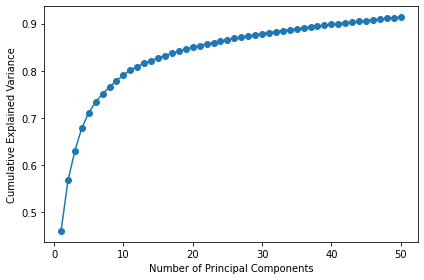

In [3]:
# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.tight_layout()
plt.show()

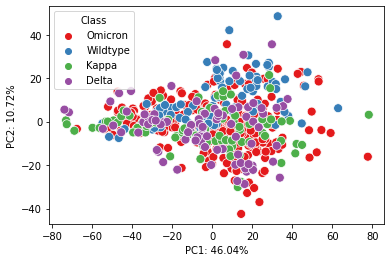

In [4]:
# PCA df with PC1, PC2 and target labels
X_pca_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
X_pca_df["Class"] = y

# Scatter plot showing PC1 vs PC2 with target label
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Class', palette='Set1', s=80)
plt.xlabel(f'PC1: {explained_variance[0]*100:.2f}%')
plt.ylabel(f'PC2: {explained_variance[1]*100:.2f}%')
plt.show()

## 2. PCA analysis for Omicron subvariants

In [5]:
# Data
from scripts.preprocessing_omicron import preprocess
data = preprocess("data/train_set").spectra2df()
data = data.loc[data["Class"].isin(["BA1", "BA2", "BA5", "XBB"])]

# Target labels
y = data["Class"]

# Feature matrix
X = data.drop(["Class", "Sample"], axis=1) 

# Scaling training and validation set
sds = joblib.load("models/scaler_omicron1.pkl")
X_scaled = pd.DataFrame(sds.fit_transform(X), columns=X.columns)

# PCA
pca = PCA(n_components=50, random_state=42)

# PCA transformation
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

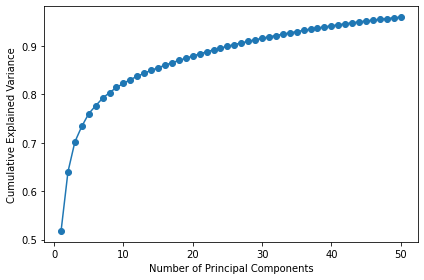

In [6]:
# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker="o")
plt.ylabel("Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.tight_layout()
plt.show()

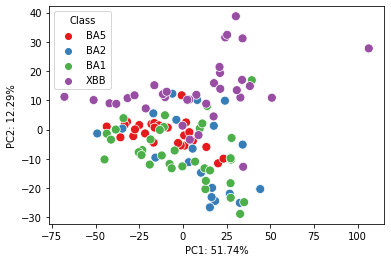

In [7]:
# PCA df with PC1, PC2 and target labels
X_pca_df = pd.DataFrame(X_pca[:, :2], columns=["PC1", "PC2"])
X_pca_df["Class"] = y

# Scatter plot showing PC1 vs PC2 with target label
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Class', palette='Set1', s=80)
plt.xlabel(f'PC1: {explained_variance[0]*100:.2f}%')
plt.ylabel(f'PC2: {explained_variance[1]*100:.2f}%')
plt.show()